# Assignment 7 - Data Analytics I

Problem Statement
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

# Theory before Assignment 7

## What is scikit-learn (sklearn)?
Scikit-learn is a popular open-source Python library for machine learning. It provides simple and efficient tools for building and evaluating models in tasks like classification and regression
Scikit-learn includes many built-in algorithms (called estimators) for supervised and unsupervised learning, and supports tasks such as classification, regression, clustering, and dimensionality reduction
It is designed to work well with scientific Python libraries like NumPy and SciPy, and is released under a permissive BSD license​

```bash
pip install scikit-learn
```

```python
import sklearn
```

## Loading Data
Scikit-learn comes with a few built-in datasets (mostly for example and testing). One classic dataset is the Iris flower dataset, which is a simple multiclass classification problem​. 

We can load the Iris data with sklearn.datasets.load_iris:

```python
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data        # feature matrix (shape: [150 samples, 4 features])
y = iris.target      # target labels (0, 1, 2 for three Iris species)
```


## Splitting Data
Before training a model, it’s common to split the data into training and testing sets. The training set is used to fit the model, and the test set is used to evaluate how well the model generalizes to unseen data. Scikit-learn provides a convenient function for this: train_test_split

For example, with the Iris data:
```python
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```
Here `X_train` and `y_train` will be used to train the model, and `X_test` and `y_test` to evaluate it. We set `random_state=42` to make the split reproducible. The `train_test_split` function randomly shuffles and splits the arrays into train/test sets in one line​

## Preprocessing Data
Real-world data often needs preprocessing before training. A common step is feature scaling, which makes numeric features have similar ranges. Scikit-learn’s `StandardScaler` standardizes features by removing the mean and scaling to unit variance

In other words, each feature will have mean ≈0 and standard deviation 1 after scaling. This can help many algorithms behave better.

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data, then transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

## Regression Example

Let’s walk through a simple regression example using LinearRegression. We first create a synthetic regression dataset with one feature, using make_regression. This generates data for a linear relationship plus noise:

```python
from sklearn.datasets import make_regression

# Create synthetic regression data (100 samples, 1 feature, with some noise)
X_reg, y_reg = make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1
)

# Split into training and testing subsets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale the feature (mean=0, unit variance) using the same approach
scaler_reg = StandardScaler()
X_reg_train = scaler_reg.fit_transform(X_reg_train)
X_reg_test = scaler_reg.transform(X_reg_test)
```

Now we create a LinearRegression model and fit it on the training data. Scikit-learn’s LinearRegression fits a linear model to minimize the residual sum of squares

```python
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)       # model learns coefficients

# Make predictions on the test set
y_reg_pred = lr.predict(X_reg_test)    # model outputs continuous predictions

# Evaluate performance using Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
print(f"RMSE: {rmse:.2f}")
```

## Evaluating Model Performance
Finally, a few words on evaluation metrics. For classification, a simple metric is accuracy, which is the fraction of correct predictions​.
In code we used accuracy_score(y_true, y_pred). For regression, common metrics include Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). RMSE is often reported, as above.
For completeness, one could compute both metrics together:

```python
from sklearn.metrics import accuracy_score, mean_squared_error

accuracy = accuracy_score(y_test, y_pred)       # from classification example
rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)  # from regression example
print(f"Final Accuracy: {accuracy:.2f}")
print(f"Final RMSE: {rmse:.2f}")
```

These metrics give a quick numerical summary of model performance (higher accuracy is better for classification; lower RMSE is better for regression). Scikit-learn provides many other metrics (precision, recall, F1-score for classification; R², MAE for regression, etc.) 

**Confusion Matrix**
```python
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
```

## Full Example

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Train a model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
```

---

# Assignment 07 - Data Analytics I

### About Boston Housing Dataset

1. **`crim`**: This represents the **crime rate** in each town, indicating how many crimes happen per person.

2. **`zn`**: This shows the **percentage of land** in a town that is zoned for large residential lots, specifically those that are bigger than 25,000 square feet.

3. **`indus`**: This tells us the **percentage of land** in a town that is used for non-retail businesses, such as factories or offices.

4. **`chas`**: This is a **dummy variable** (either 1 or 0) that indicates whether a town is located **next to the Charles River**. It's 1 if the town is near the river and 0 if it isn't.

5. **`nox`**: This represents the level of **nitrogen oxides** (pollution) in the air, measured in parts per 10 million.

6. **`rm`**: This is the **average number of rooms** in houses in each town, which gives an idea of how big the houses are.

7. **`age`**: This shows the **percentage of houses** in a town that were built **before 1940**. Older houses might have different characteristics compared to newer ones.

8. **`dis`**: This measures how **far each town** is from important employment centers in Boston, considering the **weighted average distance** to five key job areas.

9. **`rad`**: This indicates how **accessible** a town is to **radial highways** (major roads that connect different parts of the city), with higher values meaning easier access.

10. **`tax`**: This is the **property tax rate** in each town, measured per $10,000 of the property’s value.

11. **`ptratio`**: This is the **ratio of pupils to teachers** in schools within each town. A lower ratio means more teachers per student.

12. **`black`**: This shows how **racially diverse** each town is by measuring the proportion of the population that is Black. It's calculated using a formula based on the percentage of Black people in the town.

13. **`lstat`**: This measures the **percentage of people** in a town with **lower social and economic status**. Higher values suggest a higher proportion of people with lower income or education levels.

14. **`medv`**: This represents the **median value** of houses in each town, given in **thousands of dollars**. It’s a measure of how expensive homes are in that area.

---

### Load the data using Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("boston_housing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [4]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
print("Correlation with the target feature")
df.corr()['medv']

Correlation with the target feature


crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

## Data Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution

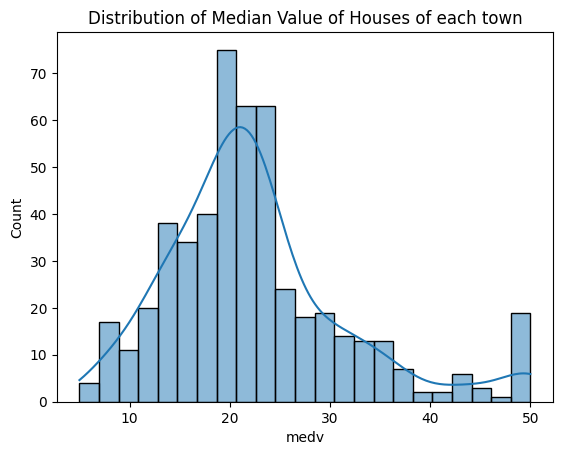

In [9]:
sns.histplot(df, x="medv", kde=True)
plt.title("Distribution of Median Value of Houses of each town")
plt.show()

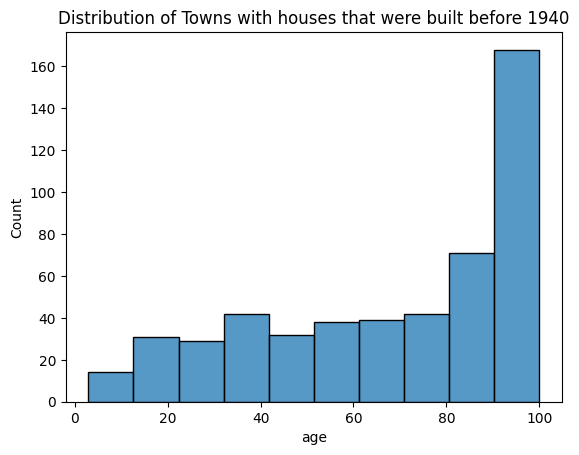

In [10]:
sns.histplot(df, x="age")
plt.title("Distribution of Towns with houses that were built before 1940")
plt.show()

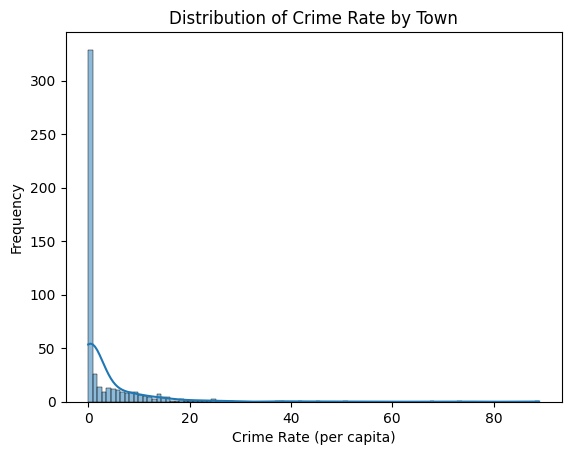

In [11]:
sns.histplot(df['crim'], kde=True)
plt.title('Distribution of Crime Rate by Town')
plt.xlabel('Crime Rate (per capita)')
plt.ylabel('Frequency')
plt.show()

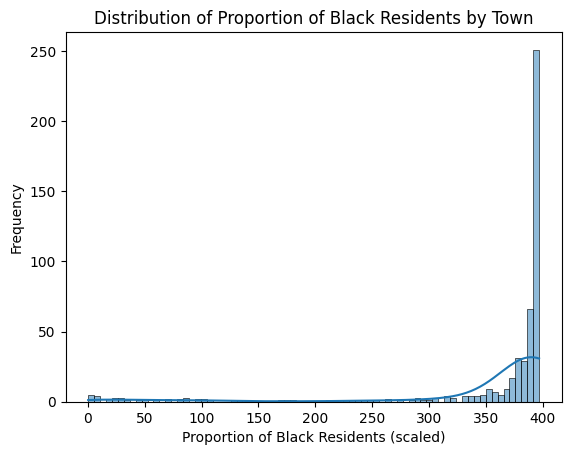

In [12]:
sns.histplot(df['b'], kde=True)
plt.title('Distribution of Proportion of Black Residents by Town')
plt.xlabel('Proportion of Black Residents (scaled)')
plt.ylabel('Frequency')
plt.show()

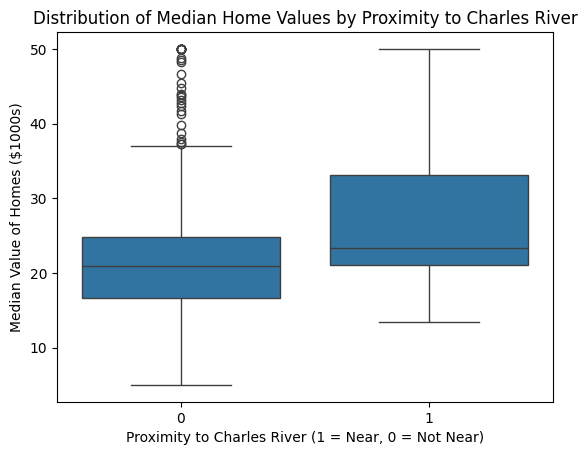

In [13]:
sns.boxplot(data=df, x="chas", y="medv")
plt.title('Distribution of Median Home Values by Proximity to Charles River')
plt.xlabel('Proximity to Charles River (1 = Near, 0 = Not Near)')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()

Lets make a categorical variable using `crim` feature (crime rate) based on the 25th and 75th percentiles

In [14]:
q1 = df['crim'].quantile(0.25)
q3 = df['crim'].quantile(0.75)
df['crime_category'] = df['crim'].apply(lambda x: 3 if x >= q3 else 2 if x > q1 else 1)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crime_category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,2


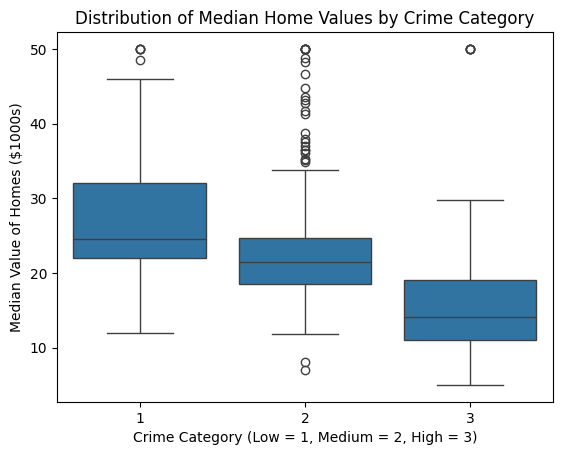

In [15]:
sns.boxplot(data=df, x="crime_category", y="medv")
plt.title('Distribution of Median Home Values by Crime Category')
plt.xlabel('Crime Category (Low = 1, Medium = 2, High = 3)')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()


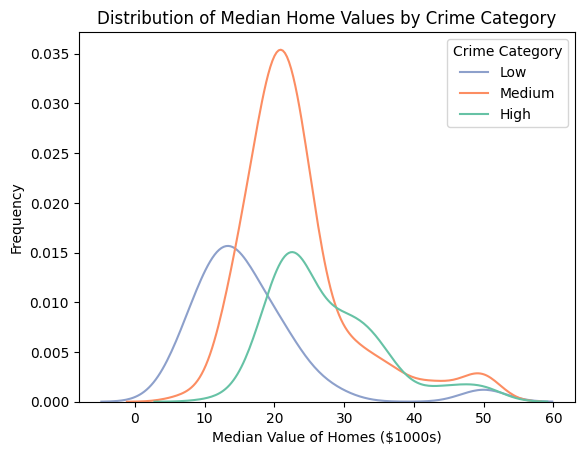

In [16]:
sns.kdeplot(df, x="medv", hue="crime_category",palette="Set2",fill=False)
plt.title('Distribution of Median Home Values by Crime Category')
plt.xlabel('Median Value of Homes ($1000s)')
plt.ylabel('Frequency')
plt.legend(title="Crime Category", labels=["Low","Medium","High"])
plt.show()

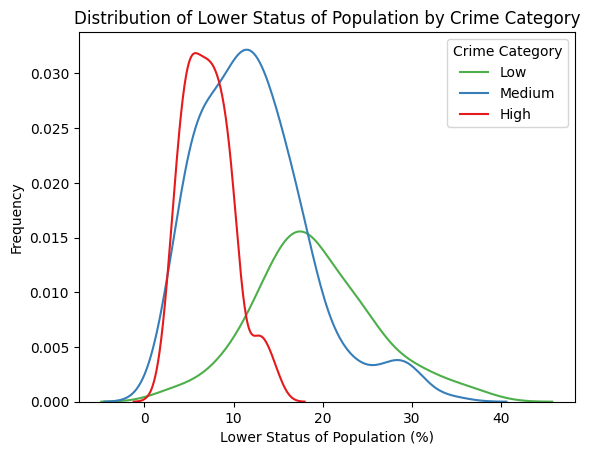

In [17]:
sns.kdeplot(df,x="lstat",hue="crime_category",fill=False,palette="Set1")
plt.title('Distribution of Lower Status of Population by Crime Category')
plt.xlabel('Lower Status of Population (%)')
plt.ylabel('Frequency')
plt.legend(title="Crime Category", labels=["Low","Medium","High"])
plt.show()

## Data Analytics

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

In [19]:
X = df.drop(columns=['medv']).values
y = df['medv'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

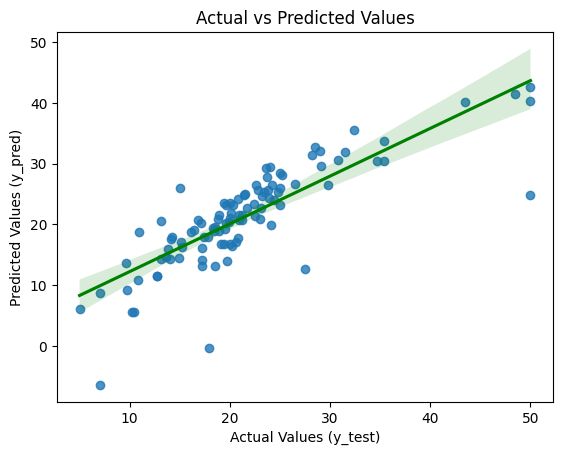

In [24]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"green"}) 
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

# Performance Evaluation

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [27]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 24.2677
Root Mean Squared Error (RMSE): 4.9262
Mean Absolute Error (MAE): 3.2011
R-squared (R²): 0.6691
